In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'Fig5D_data.xlsx'
xl = pd.ExcelFile(filename)

gfp = xl.parse('Fig5D_originally_suppressed', index_col = 0, header = 0)
gfp.insert(0, 'sample_name', np.array(['suppressed','resting','enriched','detected']))
gfp

,sample_name,col1,col2,col3,col4,col5
cm+atc,suppressed,10,12,7,16,12
cm,resting,212,290,106,359,583
cm+kan,enriched,556,357,454,274,410
cm+ttr,detected,332,703,193,1267,1129


In [3]:
gfp_long = pd.melt(gfp, id_vars='sample_name', value_vars=['col1', 'col2', 'col3', 'col4', 'col5'], value_name = 'GFP')
gfp_long.rename(columns = {'variable':'replicate'}, inplace = True)
gfp_long

,sample_name,replicate,GFP
0,suppressed,col1,10
1,resting,col1,212
2,enriched,col1,556
3,detected,col1,332
4,suppressed,col2,12
5,resting,col2,290
6,enriched,col2,357
7,detected,col2,703
8,suppressed,col3,7
9,resting,col3,106


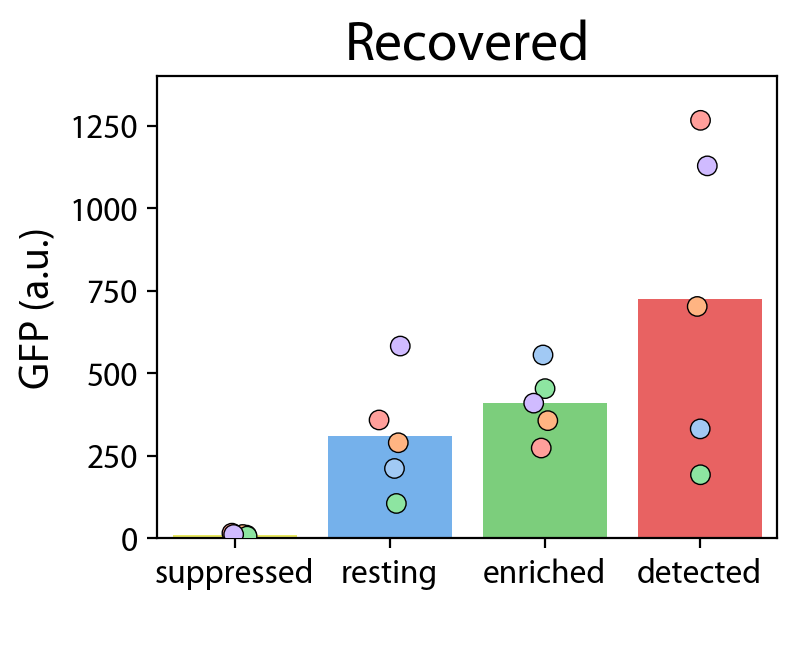

In [4]:
fig, ax = plt.subplots(figsize=(4, 3), dpi = 200)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

# Draw the bar chart
b = sns.barplot(data=gfp_long, x="sample_name", y="GFP", hue = 'sample_name',
    alpha=0.7, errorbar=None,palette = ['yellow', 'dodgerblue', 'limegreen', 'red'],ax = ax)

# Draw the stripplot
sns.stripplot(data=gfp_long, x="sample_name", y="GFP", 
    hue="replicate", edgecolor="black", linewidth=.5,s = 7,ax=ax,palette = sns.color_palette('pastel', 5))

# Remove the old legend
ax.legend_.remove()


b.axes.set_title("Recovered",fontsize=20)
b.set_xlabel(" ",fontsize=15)
b.set_ylabel("GFP (a.u.)",fontsize=15)
b.tick_params(labelsize=5)
b.tick_params(axis='both', which='major', labelsize=12)
plt.ylim([0, 1400])

plt.xticks(range(4), ['suppressed', 'resting', 'enriched', 'detected'], fontsize=12)

plt.savefig('fig5d.svg', format='svg',bbox_inches='tight', pad_inches=0.1)

plt.show()
